### Portfolio of Oil Exploration Assets: Learning Options, Sequential Drilling Options and Defer Options 
####  Marco Antonio Guimarães Dias, 
#### Luigi de Magalhães Detomi Calvette
##### RO Congress - Boston 2017


[Paper](http://www.realoptions.org/openconf2017/data/papers/57.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import time
import winsound

In [2]:

duration = 1000  # milliseconds
freq = 440  # Hz

In [3]:
###Dados de Entrada###
r=0.03
delta=0.038
sigma=0.3
tau=3
Po=50


In [4]:
#Importar Case 2 ou ABC ou ABCD como case 
case=pd.read_csv("Case_Guy.csv", sep=';')
case.set_index('Type', inplace=True)
case=case.astype(float).T
case

Type,DogFish,Feather,Head
CF,0.3,0.25,0.20
I_w,80.0,60.00,80.00
q,0.2,0.21,0.18
B,620.0,310.00,950.00
Owner,0.0,0.00,1.00


In [5]:
case.iloc[2,:]=case.iloc[2,:]*np.exp(-2*delta)
case.head()

Type,DogFish,Feather,Head
CF,0.300000,0.250000,0.200000
I_w,80.000000,60.000000,80.000000
q,0.185363,0.194631,0.166827
B,620.000000,310.000000,950.000000
Owner,0.000000,0.000000,1.000000


In [6]:
#Importar correlacao Case 2 ou ABC ou ABCD como case
case_corr=pd.read_csv("Case_Guy_corr.csv", sep=';')
case_corr.set_index('Type', inplace=True)
case_corr


,DogFish,Feather,Head
Type,,,
DogFish,1.0,0.6,0.5
Feather,0.6,1.0,0.6
Head,0.5,0.6,1.0


In [7]:
###############Bloco 1####################3


In [156]:
case_b1=pd.read_csv("Case_Guy_b1.csv", sep=';')
case_b1.set_index('Type', inplace=True)
case_b1=case_b1.astype(float).T
case_b1

Type,DogFish,Feather
CF,0.3,0.25
I_w,80.0,60.00
q,0.2,0.21
B,620.0,310.00
Owner,0.0,0.00


In [157]:
case_b1.iloc[2,:]=case_b1.iloc[2,:]*np.exp(-2*delta)

In [158]:
case_b1

Type,DogFish,Feather
CF,0.300000,0.250000
I_w,80.000000,60.000000
q,0.185363,0.194631
B,620.000000,310.000000
Owner,0.000000,0.000000


In [159]:
case_corr_b1=pd.read_csv("Case_Guy_corr_b1.csv", sep=';')
case_corr_b1.set_index('Type', inplace=True)
case_corr_b1


,DogFish,Feather
Type,,
DogFish,1.0,0.6
Feather,0.6,1.0


In [12]:
###############Bloco 2##########################


In [13]:
def V(P,case,w):
    valor=P*case.iloc[2,k[w]]*case.iloc[3,k[w]]
    return valor

    
    

In [14]:
def I(case,w):
    invest=case.iloc[3,k[w]]*5.35 + 650
    invest=invest*np.exp(-2*r)
    return invest

In [15]:
def VME(P,case,i):
    VPL=P*case.iloc[2,i]*case.iloc[3,i] - (case.iloc[3,i]*5.35 + 650)*np.exp(-2*r)
    vme=case.iloc[0,i]*VPL - case.iloc[1,i]
    return vme

In [16]:
print(VME(50,case,0))
print(VME(50,case,1))
print(VME(50,case,2))


523.0841727818364
150.6808316428877
425.1226754622021


In [17]:
VME(50,case,0)+VME(50,case,1) + VME(50,case,2)

1098.8876798869262

In [18]:
VME(50,case,0)+VME(50,case,1)

673.7650044247241

In [19]:
#################Formalizacao caso - correto
fold=[]
seq=[]
P=50
n=case.shape[1]
perm=itertools.permutations(range(n))
for k in list(perm):
    seq.append(k)
    #print(k)
    m=np.zeros((2**(n-1),n))
    p=np.zeros((2**(n-1),n))
    pi=np.zeros((2**(n-1),n))
    m[m==0]=np.nan
    p[m==0]=np.nan
    pi[pi==0]=np.nan
    
    
    m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
    pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
    
    #Vetores Auxiliares
    Ax_m=[]
    Ax1_m=[]
    Ax_pi=[]
    Ax_lim=[]
    ##Loop para criacao da matriz de FC e VME
    for y in range(1,n,1):
        Ax_m.append(case.iloc[0,k[y]])
    
    
    for j in range(n-1):
        p=0
        for q in range(1+j,n,1):
            for i in range(2**(j)):
                p=p+1
                #print(p-1,j,q,i,j)
                CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                Ax1_m.append(CF_s)
                CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                Ax1_m.append(CF_ins)
                
                Ax_pi.append(CF_s*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                Ax_pi.append(CF_ins*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                
                a=np.minimum(Ax_m[p-1],m[i,j])*(1-np.maximum(Ax_m[p-1],m[i,j]))
                b=np.maximum(Ax_m[p-1],m[i,j])*(1-np.minimum(Ax_m[p-1],m[i,j]))
                Ax_lim.append(np.sqrt(a/b)>case_corr.iloc[k[j],k[q]])
                
                a=-np.sqrt(Ax_m[p-1]*m[i,j]/(1-Ax_m[p-1])*(1-m[i,j]))
                b=-np.sqrt((1-Ax_m[p-1])*(1-m[i,j])/Ax_m[p-1]*m[i,j])
                Ax_lim.append(np.maximum(a,b)<case_corr.iloc[k[j],k[q]])
                

        m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
        pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]
        
        del Ax1_m[0:2*(i+1)]
        
        print(Ax_lim)
        Ax_m=Ax1_m
        Ax1_m=[]
        Ax_pi=[]
        Ax_lim=[]
    
    print(100*m)
    #print(pi)
    
    for l in np.arange(n-2,-1,-1):
        #print(l)
        for g in range(2**(l)):
            #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
            pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
    #print(pi)
    fold.append(pi[0,0])
    


###Fornece o melhor portfolio seq_winner e o valor do porfolio winner

winner=np.amax(fold)
Seq_winner=seq[np.argmax(fold)]
winner=np.maximum(0,winner)
if winner==0:
    Seq_winner='W'

seq_sec=list(seq)
num=np.argmax(fold)
fold_sec=list(fold)
fold_sec.remove(np.amax(fold))
del seq_sec[num]
    
second=np.amax(fold_sec)
Seq_sec=seq_sec[np.argmax(fold_sec)]
second=np.maximum(0,second)
if second==0:
    Seq_sec='W'

diff=winner-second

    
    
            

    #print(fold)
    #print(m)
print('melhor:',Seq_winner, '$melhor:', winner,'segundo:',Seq_sec,'$Segundo:',second,'diff:',diff, fold)
#print(fold)
    
    
    
print(np.argmax(fold))    
    
    

[True, True, True, True]
[True, True, True, True]
[[30.         64.68626967 72.71514427]
 [        nan  7.99159871  9.95020999]
 [        nan         nan 58.53064256]
 [        nan         nan  2.42303146]]
[True, True, True, True]
[True, True, True, True]
[[30.         50.55050463 93.04895105]
 [        nan  6.90692659 35.69208386]
 [        nan         nan 67.72236566]
 [        nan         nan  3.5599476 ]]
[True, True, True, True]
[True, True, True, True]
[[25.         77.6235236  74.62763853]
 [        nan 14.12549213 16.26983941]
 [        nan         nan 35.74712621]
 [        nan         nan  1.2741104 ]]
[True, True, True, True]
[True, True, True, True]
[[25.         61.56921938 94.08695317]
 [        nan  6.14359354 51.24777763]
 [        nan         nan 82.19061805]
 [        nan         nan  9.67012799]]
[True, True, True, True]
[True, True, True, True]
[[20.         75.82575695 91.22689345]
 [        nan 18.54356076 32.21627957]
 [        nan         nan 52.8885573 ]
 [   

In [20]:
seq,seq_sec

([(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)],
 [(0, 1, 2), (0, 2, 1), (1, 2, 0), (2, 0, 1), (2, 1, 0)])

In [21]:
fold,fold_sec


([1110.9982998297828,
  1118.436893699291,
  1129.6871499844528,
  1098.8876798869262,
  1123.1400272249307,
  1098.8876798869262],
 [1110.9982998297828,
  1118.436893699291,
  1098.8876798869262,
  1123.1400272249307,
  1098.8876798869262])

In [22]:
num

2

In [23]:
np.argmax(fold)

2

In [24]:
fold

[1110.9982998297828,
 1118.436893699291,
 1129.6871499844528,
 1098.8876798869262,
 1123.1400272249307,
 1098.8876798869262]

In [25]:
def carteira(case,case_corr,P):
    #################Formalizacao caso 4 - correto
    fold=[]
    seq=[]
    #P=50
    n=case.shape[1]
    perm=itertools.permutations(range(n))
    for k in list(perm):
        seq.append(k)
        #print(k)
        m=np.zeros((2**(n-1),n))
        p=np.zeros((2**(n-1),n))
        pi=np.zeros((2**(n-1),n))
        m[m==0]=np.nan
        p[m==0]=np.nan
        pi[pi==0]=np.nan


        m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
        pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)*np.exp(-2*r)) -case.iloc[1,k[0]]

        #Vetores Auxiliares
        Ax_m=[]
        Ax1_m=[]
        Ax_pi=[]
        ##Loop para criacao da matriz de FC e VME
        for y in range(1,n,1):
            Ax_m.append(case.iloc[0,k[y]])


        for j in range(n-1):
            p=0
            for q in range(1+j,n,1):
                for i in range(2**(j)):
                    p=p+1
                    #print(p-1,j,q,i,j)
                    CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                    Ax1_m.append(CF_s)
                    CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                    Ax1_m.append(CF_ins)

                    Ax_pi.append(CF_s*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)*np.exp(-2*r)) -case.iloc[1,k[j+1]])
                    Ax_pi.append(CF_ins*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)*np.exp(-2*r)) -case.iloc[1,k[j+1]])


            m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
            pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]

            del Ax1_m[0:2*(i+1)]

            Ax_m=Ax1_m
            Ax1_m=[]
            Ax_pi=[]

        #print(100*m)
        #print(pi)

        for l in np.arange(n-2,-1,-1):
            #print(l)
            for g in range(2**(l)):
                #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
                pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
        #print(pi)
        fold.append(pi[0,0])


    ###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
    winner=np.amax(fold)
    Seq_winner=seq[np.argmax(fold)]
    winner=np.maximum(0,winner)
    if winner==0:
        Seq_winner='W'
    
    
    seq_sec=list(seq)
    num=np.argmax(fold)
    fold_sec=list(fold)
    fold_sec.remove(np.amax(fold))
    del seq_sec[num]
    
    second=np.amax(fold_sec)
    Seq_sec=seq_sec[np.argmax(fold_sec)]
    second=np.maximum(0,second)
    if second==0:
        Seq_sec='W'
    diff=winner-second



        #print(fold)
        #print(m)
    #print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
    #print(fold)
    return[Seq_winner,winner,Seq_sec, second, diff,fold]







In [165]:
cart=carteira(case,case_corr,50)
print(cart)

[(1, 0, 2), 1129.6871499844528, (2, 0, 1), 1123.1400272249307, 6.5471227595221535, [1110.9982998297828, 1118.436893699291, 1129.6871499844528, 1098.8876798869262, 1123.1400272249307, 1098.8876798869262]]


In [166]:
cart=carteira(case_b1,case_corr_b1,50)
print(cart)

[(0, 1), 673.7650044247241, (1, 0), 673.7650044247241, 0.0, [673.7650044247241, 673.7650044247241]]


In [28]:
for i in range(200):
    print(i, carteira(case_b1,case_corr_b1,i)[0],carteira(case_b1,case_corr_b1,i)[1],carteira(case_b1,case_corr_b1,i)[3],carteira(case_b1,case_corr_b1,i)[2], carteira(case_b1,case_corr_b1,i)[4] )

0 W 0.0 0.0 W 0.0
1 W 0.0 0.0 W 0.0
2 W 0.0 0.0 W 0.0
3 W 0.0 0.0 W 0.0
4 W 0.0 0.0 W 0.0
5 W 0.0 0.0 W 0.0
6 W 0.0 0.0 W 0.0
7 W 0.0 0.0 W 0.0
8 W 0.0 0.0 W 0.0
9 W 0.0 0.0 W 0.0
10 W 0.0 0.0 W 0.0
11 W 0.0 0.0 W 0.0
12 W 0.0 0.0 W 0.0
13 W 0.0 0.0 W 0.0
14 W 0.0 0.0 W 0.0
15 W 0.0 0.0 W 0.0
16 W 0.0 0.0 W 0.0
17 W 0.0 0.0 W 0.0
18 W 0.0 0.0 W 0.0
19 W 0.0 0.0 W 0.0
20 W 0.0 0.0 W 0.0
21 W 0.0 0.0 W 0.0
22 W 0.0 0.0 W 0.0
23 W 0.0 0.0 W 0.0
24 W 0.0 0.0 W 0.0
25 W 0.0 0.0 W 0.0
26 W 0.0 0.0 W 0.0
27 W 0.0 0.0 W 0.0
28 W 0.0 0.0 W 0.0
29 W 0.0 0.0 W 0.0
30 W 0.0 0.0 W 0.0
31 W 0.0 0.0 W 0.0
32 W 0.0 0.0 W 0.0
33 W 0.0 0.0 W 0.0
34 W 0.0 0.0 W 0.0
35 (0, 1) 5.9207295217013325 0.0 W 5.9207295217013325
36 (0, 1) 40.39829240571029 0.0 W 40.39829240571029
37 (0, 1) 74.87585528971925 34.77310614026993 (1, 0) 40.10274914944932
38 (0, 1) 114.3871326441117 79.02704467556865 (1, 0) 35.360087968543056
39 (0, 1) 160.57337641135803 128.58854132133177 (1, 0) 31.98483509002625
40 (0, 1) 206.759620178

In [29]:
for i in range(200):
    print(i, carteira(case,case_corr,i)[0],carteira(case,case_corr,i)[1],carteira(case,case_corr,i)[3],carteira(case,case_corr,i)[2], carteira(case,case_corr,i)[4] )

0 W 0.0 0.0 W 0.0
1 W 0.0 0.0 W 0.0
2 W 0.0 0.0 W 0.0
3 W 0.0 0.0 W 0.0
4 W 0.0 0.0 W 0.0
5 W 0.0 0.0 W 0.0
6 W 0.0 0.0 W 0.0
7 W 0.0 0.0 W 0.0
8 W 0.0 0.0 W 0.0
9 W 0.0 0.0 W 0.0
10 W 0.0 0.0 W 0.0
11 W 0.0 0.0 W 0.0
12 W 0.0 0.0 W 0.0
13 W 0.0 0.0 W 0.0
14 W 0.0 0.0 W 0.0
15 W 0.0 0.0 W 0.0
16 W 0.0 0.0 W 0.0
17 W 0.0 0.0 W 0.0
18 W 0.0 0.0 W 0.0
19 W 0.0 0.0 W 0.0
20 W 0.0 0.0 W 0.0
21 W 0.0 0.0 W 0.0
22 W 0.0 0.0 W 0.0
23 W 0.0 0.0 W 0.0
24 W 0.0 0.0 W 0.0
25 W 0.0 0.0 W 0.0
26 W 0.0 0.0 W 0.0
27 W 0.0 0.0 W 0.0
28 W 0.0 0.0 W 0.0
29 W 0.0 0.0 W 0.0
30 W 0.0 0.0 W 0.0
31 W 0.0 0.0 W 0.0
32 W 0.0 0.0 W 0.0
33 W 0.0 0.0 W 0.0
34 W 0.0 0.0 W 0.0
35 (0, 1, 2) 5.9207295217013325 5.9207295217013325 (0, 2, 1) 0.0
36 (0, 2, 1) 62.92730908945186 49.78470234762641 (0, 1, 2) 13.142606741825453
37 (0, 2, 1) 121.43944879555607 118.33486773700339 (0, 1, 2) 3.1045810585526823
38 (0, 2, 1) 187.6014963758596 186.8850331263806 (0, 1, 2) 0.7164632494790055
39 (0, 1, 2) 255.43519851575797 255.20612356

151 (0, 1, 2) 9306.007381806405 9306.007381806405 (0, 2, 1) 0.0
152 (0, 2, 1) 9387.265992716499 9387.265992716499 (2, 0, 1) 0.0
153 (0, 1, 2) 9468.524603626593 9468.524603626593 (0, 2, 1) 0.0
154 (0, 1, 2) 9549.783214536687 9549.783214536687 (1, 0, 2) 0.0
155 (0, 1, 2) 9631.04182544678 9631.04182544678 (0, 2, 1) 0.0
156 (2, 0, 1) 9712.300436356876 9712.300436356874 (0, 1, 2) 1.8189894035458565e-12
157 (0, 1, 2) 9793.55904726697 9793.55904726697 (2, 1, 0) 0.0
158 (2, 1, 0) 9874.817658177062 9874.81765817706 (0, 1, 2) 1.8189894035458565e-12
159 (0, 1, 2) 9956.076269087156 9956.076269087156 (0, 2, 1) 0.0
160 (2, 0, 1) 10037.33487999725 10037.334879997248 (0, 1, 2) 1.8189894035458565e-12
161 (1, 0, 2) 10118.593490907342 10118.593490907342 (2, 0, 1) 0.0
162 (0, 1, 2) 10199.852101817436 10199.852101817436 (0, 2, 1) 0.0
163 (0, 1, 2) 10281.11071272753 10281.11071272753 (0, 2, 1) 0.0
164 (0, 2, 1) 10362.369323637626 10362.369323637624 (0, 1, 2) 1.8189894035458565e-12
165 (0, 2, 1) 10443.627934

In [30]:
def diffinexpcart(case,case_corr,P,r,div,sigma,tau,accur):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    #accur=0.05  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaP=P*accur
    
    # M são as divisões do grid em V
    #Perpetuidade vcritico não esta na programacao
    #M= int(1.1*vcritico(I,r,div,sigma,tau)[2]/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    Pmax=2*P
    M=int(Pmax/deltaP)
    PGrid=int(P/deltaP) #Ponto do grid onde esta P_0. 
    
    #deltat= (deltaP**2)/((sigma**2)*((3*I)**2)) #Convergência: Critério do peso central >=0. Pmax=3I ><1.1Gatilho_perp
    deltat= (deltaP**2)/((sigma**2)*(Pmax**2))
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    
    #Vetor Pt
    Pt=np.zeros(M+1)
    Gatilho=np.zeros((N+1,M+1), dtype=object)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Pt[i]= i*deltaP
        solution=carteira(case,case_corr,Pt[i])
        F[N,i]=solution[1]
        #print(solution[0])
        Gatilho[N,i]=solution[0]
        #F[N,i]=np.maximum(0,Pt[i]-I)
    #Gatilho[N]=I
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pdown = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pdown*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            #if F[j,i]< Vt[i]-I and F[j,i-1]>Pt[i-1]-I:
            #    Gatilho[j]=(Pt[i]+Vt[i-1])/2
            
            solution=carteira(case,case_corr,Pt[i])
            if F[j,i]>=solution[1]: #opcao americana e gatilho
                Gatilho[j,i]='W'
            else:
                Gatilho[j,i]=solution[0]
                F[j,i]=solution[1]
        
        
        F[j,0]=0
        Gatilho[j,0]='W'
        solution=carteira(case,case_corr,Pt[i])
        F[j,M]=solution[1]
        Gatilho[j,M]=solution[0]
        
    T=np.linspace(0,tau,num=N+1)
    
    ###############Dataframe do Gatilho##############
    #print(Gatilho.shape[0])
    dframe=pd.DataFrame(list(range(Gatilho.shape[0])))
    dframe.columns=['Time']
    dframe= dframe.set_index('Time')

    for i in range(Gatilho.shape[0]):
        check=Gatilho[i,0]
        for j in range(Gatilho.shape[1]):
            if check == Gatilho[i,j]:
                check=check
            else:
                #print(i,j,'{}'.format(check),Gatilho[i,j],j)
                dframe.loc[i,'{}'.format(Gatilho[i,j-1])]=Pt[j]
                check=Gatilho[i,j]
    dframe.index=T
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,PGrid+1],dframe,T,Pt,F,Gatilho]



In [31]:
case_corr

,DogFish,Feather,Head
Type,,,
DogFish,1.0,0.6,0.5
Feather,0.6,1.0,0.6
Head,0.5,0.6,1.0


In [265]:
accur=0.02
start=time.time()
solucao=diffinexpcart(case,case_corr,50,r,delta,sigma,tau,accur)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 13.622871780395508


In [266]:
solucao[0]

1347.8941559350385

In [267]:
solucao[1]

,W,"(0, 1, 2)","(1, 0, 2)","(0, 2, 1)","(1, 2, 0)","(2, 0, 1)"
0.000000,73.0,95.0,99.0,97.0,87.0,91.0
0.001111,73.0,95.0,99.0,97.0,87.0,91.0
0.002221,73.0,95.0,99.0,97.0,87.0,91.0
0.003332,73.0,95.0,99.0,97.0,87.0,91.0
0.004443,73.0,95.0,99.0,97.0,87.0,91.0
...,...,...,...,...,...,...
2.995557,46.0,95.0,99.0,97.0,87.0,91.0
2.996668,46.0,95.0,99.0,97.0,87.0,91.0
2.997779,46.0,95.0,99.0,97.0,87.0,91.0
2.998889,46.0,95.0,99.0,97.0,87.0,91.0


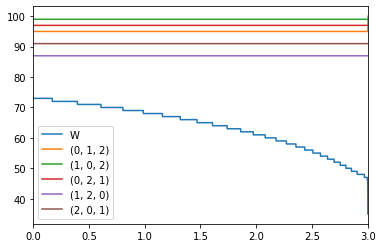

In [268]:
solucao[1].plot()

In [269]:
solucao[5].shape

(2702, 101)

In [270]:
ima=solucao[5]

In [271]:
ima

array([['W', 'W', 'W', ..., (1, 0, 2), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (1, 0, 2), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (1, 0, 2), (0, 1, 2), (0, 1, 2)],
       ...,
       ['W', 'W', 'W', ..., (1, 0, 2), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (1, 0, 2), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (1, 0, 2), (0, 1, 2), (2, 0, 1)]],
      dtype=object)

In [272]:
ima[1000,80]==(0,1,2)

False

In [273]:
solucao[4]

array([[0.00000000e+00, 4.59513646e-08, 5.02434579e-06, ...,
        4.99930100e+03, 5.08055961e+03, 5.08055961e+03],
       [0.00000000e+00, 4.57296481e-08, 5.00276781e-06, ...,
        4.99930100e+03, 5.08055961e+03, 5.08055961e+03],
       [0.00000000e+00, 4.55088811e-08, 4.98127029e-06, ...,
        4.99930100e+03, 5.08055961e+03, 5.08055961e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.99930100e+03, 5.08055961e+03, 5.08055961e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.99930100e+03, 5.08055961e+03, 5.08055961e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.99930100e+03, 5.08055961e+03, 5.16181823e+03]])

In [274]:
ima.shape

(2702, 101)

In [275]:
w, h = ima.shape[0], ima.shape[1]
data = np.zeros((h,w, 3), dtype=np.uint8)
d1=np.zeros((h,w))
for i in range(ima.shape[0]):
    for j in range(ima.shape[1]):
        #print(j)
        if ima[i,j]=='W':
            data[ima.shape[1]-j-1,i]=[0,0,0]
            d1[ima.shape[1]-j-1,i]=0
        elif ima[i,j]==(0,1,2):
            data[ima.shape[1]-j-1,i]=[255,0,0]
            d1[ima.shape[1]-j-1,i]=1
        elif ima[i,j]==(0,2,1):
            data[ima.shape[1]-j-1,i]=[255,100,0]
            d1[ima.shape[1]-j-1,i]=2
        elif ima[i,j]==(1,0,2):
            data[ima.shape[1]-j-1,i]=[255,0,0]
            d1[ima.shape[1]-j-1,i]=3
        elif ima[i,j]==(1,2,0):
            data[ima.shape[1]-j-1,i]=[255,255,0]
            d1[ima.shape[1]-j-1,i]=4
        elif ima[i,j]==(2,1,0):
            data[ima.shape[1]-j-1,i]=[0,0,255]
            d1[ima.shape[1]-j-1,i]=5
        elif ima[i,j]==(2,0,1):
            data[ima.shape[1]-j-1,i]=[100,0,255]
            d1[ima.shape[1]-j-1,i]=6
        
        

In [276]:
d1frame=pd.DataFrame(d1)
d1frame.columns=solucao[2]
d1frame.index=solucao[3][::-1]

In [277]:
d1frame.head()

,0.000000,0.001111,0.002221,0.003332,0.004443,0.005553,0.006664,0.007775,0.008886,0.009996,...,2.990004,2.991114,2.992225,2.993336,2.994447,2.995557,2.996668,2.997779,2.998889,3.000000
100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0
99.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
98.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
97.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
96.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [278]:
winsound.Beep(freq,duration)

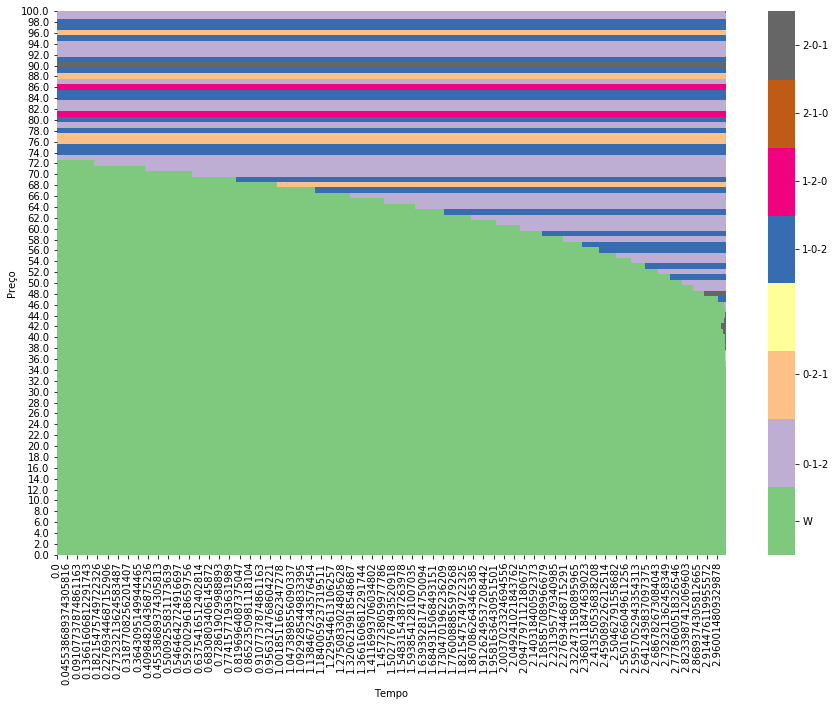

In [279]:

fig, ax=plt.subplots(figsize=(15,10))
#cbar_ax=fig.add_axes([0,1,2,3,4,5,6])
ax=sns.heatmap(d1frame, cmap="Accent")
#ax.locator_params(axis='x', nbins=4)
#ax.locator_params(axis='y',nbins=4)


colorbar = ax.collections[0].colorbar
colorbar.set_ticks([3/8,1,2,4*3/4 +3/8,5*3/4 +3/8,6*3/4 +3/8,6 - 3/8])
colorbar.set_ticklabels(['W', '0-1-2', '0-2-1','1-0-2','1-2-0','2-1-0','2-0-1'])

# X - Y axis labels
ax.set_ylabel('Preço');
ax.set_xlabel('Tempo');

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks();
plt.setp(labels, rotation=0);

#ax.set(xticklabels=solucao[2]);



In [32]:
######################################
###########Bloco b1#####################

In [167]:
case_corr_b1

,DogFish,Feather
Type,,
DogFish,1.0,0.6
Feather,0.6,1.0


In [168]:
case_b1

Type,DogFish,Feather
CF,0.300000,0.250000
I_w,80.000000,60.000000
q,0.185363,0.194631
B,620.000000,310.000000
Owner,0.000000,0.000000


In [169]:
start=time.time()
accur=0.01
solucao_b1=diffinexpcart(case_b1,case_corr_b1,50,r,delta,sigma,tau,accur)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 18.355854459603627


In [170]:
solucao_b1[1].iloc[0,0]

73.0

In [171]:
type(solucao_b1[0]),type(solucao_b1[1]),type(solucao_b1[2]),type(solucao_b1[3]),type(solucao_b1[5])

(numpy.float64,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

In [172]:
winsound.Beep(freq,duration)

In [173]:
#accur=0.01
#case_b1.iloc[3,1]=case_b1.iloc[3,1] + 5
#while solucao_b1[1].iloc[0,0] -73.125 < 0.1:
#    solucao_b1=diffinexpcart(case_b1,case_corr_b1,50,r,delta,sigma,tau,accur)
#    print(np.round(case_b1.iloc[3,1],3))
#    print(solucao_b1[1].iloc[0,0] -73.125)
#    case_b1.iloc[3,1]=case_b1.iloc[3,1] + 10
    
   

In [174]:
winsound.Beep(freq,duration)

In [175]:
#accur=0.05
#while solucao_b1[1].iloc[0,0] -73.125 > 0.1:
#    solucao_b1=diffinexpcart(case_b1,case_corr_b1,50,r,delta,sigma,tau,accur)
#    case_b1.iloc[2,1]=case_b1.iloc[2,1]*np.exp(2*delta)
#    case_b1.iloc[2,1]=case_b1.iloc[2,1]  + 0.01
#    print(np.round(case_b1.iloc[2,1],3))
#    case_b1.iloc[2,1]=case_b1.iloc[2,1]*np.exp(-2*delta)
#    print(solucao_b1[1].iloc[0,0] -73.125)
   

In [176]:
winsound.Beep(freq,duration)


In [177]:
solucao_b1[0]

806.3287497600586

In [178]:
solucao_b1[1]

,W,"(0, 1)","(1, 0)"
0.000000,73.0,95.0,96.0
0.000278,73.0,95.0,96.0
0.000556,73.0,95.0,96.0
0.000833,73.0,95.0,96.0
0.001111,73.0,95.0,96.0
...,...,...,...
2.998889,49.5,95.0,96.0
2.999167,49.5,95.0,96.0
2.999444,49.5,95.0,96.0
2.999722,49.0,95.0,96.0


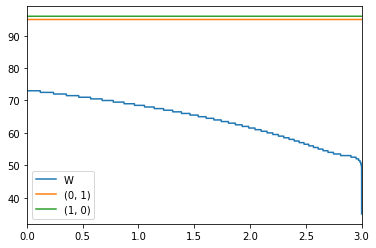

In [179]:
solucao_b1[1].plot()

In [180]:
ima=solucao_b1[5]

In [181]:
w, h = ima.shape[0], ima.shape[1]
#data = np.zeros((h,w, 3), dtype=np.uint8)
d2=np.zeros((h,w))
for i in range(ima.shape[0]):
    for j in range(ima.shape[1]):
        #print(j)
        if ima[i,j]=='W':
            #data[ima.shape[1]-j-1,i]=[0,0,0]
            d2[ima.shape[1]-j-1,i]=0
        elif ima[i,j]==(0,1):
            #data[ima.shape[1]-j-1,i]=[255,0,0]
            d2[ima.shape[1]-j-1,i]=1
        elif ima[i,j]==(1,0):
            #data[ima.shape[1]-j-1,i]=[255,100,0]
            d2[ima.shape[1]-j-1,i]=2
        

In [182]:
d2frame=pd.DataFrame(d2)
d2frame.columns=solucao_b1[2]
d2frame.index=solucao_b1[3][::-1]

In [183]:
d2frame

,0.000000,0.000278,0.000556,0.000833,0.001111,0.001389,0.001667,0.001944,0.002222,0.002500,...,2.997500,2.997778,2.998056,2.998333,2.998611,2.998889,2.999167,2.999444,2.999722,3.000000
100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
99.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
99.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
98.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
98.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


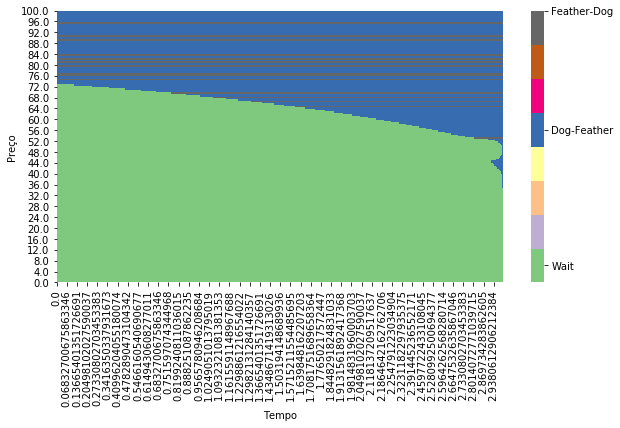

In [184]:
fig, ax=plt.subplots(figsize=(10,5))
#cbar_ax=fig.add_axes([0,1,2,3,4,5,6])
#cmap=sns.set_palette("hls",3)
ax=sns.heatmap(d2frame, cmap='Accent')
#ax=sns.set_palette("hls",3)

#ax.locator_params(axis='x', nbins=4)
#ax.locator_params(axis='y',nbins=4)


colorbar = ax.collections[0].colorbar
colorbar.set_ticks([1/8, 1+ 1/8,2])
colorbar.set_ticklabels(['Wait', 'Dog-Feather', 'Feather-Dog'])

# X - Y axis labels
ax.set_ylabel('Preço');
ax.set_xlabel('Tempo');

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks();
plt.setp(labels, rotation=0);

#ax.set(xticklabels=solucao[2]);



In [185]:
for i in range(200):
    print(i, carteira(case_b1,case_corr_b1,i)[0],carteira(case_b1,case_corr_b1,i)[1],carteira(case_b1,case_corr_b1,i)[3],carteira(case_b1,case_corr_b1,i)[2], carteira(case_b1,case_corr_b1,i)[4])

0 W 0.0 0.0 W 0.0
1 W 0.0 0.0 W 0.0
2 W 0.0 0.0 W 0.0
3 W 0.0 0.0 W 0.0
4 W 0.0 0.0 W 0.0
5 W 0.0 0.0 W 0.0
6 W 0.0 0.0 W 0.0
7 W 0.0 0.0 W 0.0
8 W 0.0 0.0 W 0.0
9 W 0.0 0.0 W 0.0
10 W 0.0 0.0 W 0.0
11 W 0.0 0.0 W 0.0
12 W 0.0 0.0 W 0.0
13 W 0.0 0.0 W 0.0
14 W 0.0 0.0 W 0.0
15 W 0.0 0.0 W 0.0
16 W 0.0 0.0 W 0.0
17 W 0.0 0.0 W 0.0
18 W 0.0 0.0 W 0.0
19 W 0.0 0.0 W 0.0
20 W 0.0 0.0 W 0.0
21 W 0.0 0.0 W 0.0
22 W 0.0 0.0 W 0.0
23 W 0.0 0.0 W 0.0
24 W 0.0 0.0 W 0.0
25 W 0.0 0.0 W 0.0
26 W 0.0 0.0 W 0.0
27 W 0.0 0.0 W 0.0
28 W 0.0 0.0 W 0.0
29 W 0.0 0.0 W 0.0
30 W 0.0 0.0 W 0.0
31 W 0.0 0.0 W 0.0
32 W 0.0 0.0 W 0.0
33 W 0.0 0.0 W 0.0
34 W 0.0 0.0 W 0.0
35 (0, 1) 5.9207295217013325 0.0 W 5.9207295217013325
36 (0, 1) 40.39829240571029 0.0 W 40.39829240571029
37 (0, 1) 74.87585528971925 34.77310614026993 (1, 0) 40.10274914944932
38 (0, 1) 114.3871326441117 79.02704467556865 (1, 0) 35.360087968543056
39 (0, 1) 160.57337641135803 128.58854132133177 (1, 0) 31.98483509002625
40 (0, 1) 206.759620178

In [186]:
print('o gatilho é:',solucao_b1[1].iloc[0,0])

o gatilho é: 73.0


In [187]:
print('o portfólio vale 822.79:', solucao_b1[0])

o portfólio vale 822.79: 806.3287497600586


In [188]:
winsound.Beep(freq,duration)


In [189]:
#################################
#######Exportar array############

In [190]:
solucao_b1[3]

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

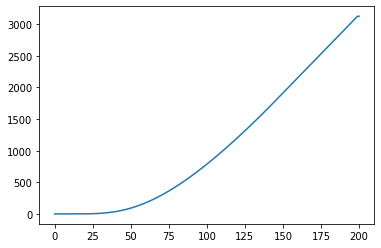

In [191]:
plt.plot(solucao_b1[4][0,:])

In [192]:
np.savetxt('Port_Explorar_opcao_dog_feather.txt',solucao_b1[4][0,:])

In [193]:
np.savetxt('Port_Explorar_preco_dog_feather.txt',solucao_b1[3])

In [ ]:
#################################
#######importar array############

In [247]:
vme_port=np.loadtxt('Opcao_portf_dog_feather.txt')

In [248]:
vme_port_preco=np.loadtxt('Preco_portf_dog_feather.txt')

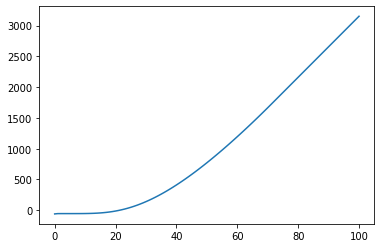

In [249]:
plt.plot(vme_port_preco,vme_port)

In [250]:
opcao_port_1=np.interp(solucao_b1[3],vme_port_preco,vme_port)

In [251]:
preco=solucao_b1[3]
opcao=solucao_b1[4][0,:]


Text(0.5, 0, 'Preço do Petróleo (\\$/bbl)')

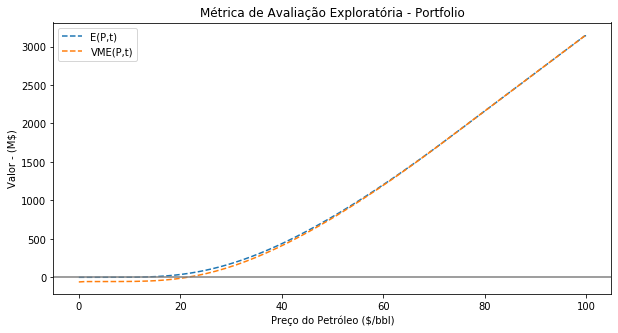

In [253]:
fig,ax=plt.subplots(figsize=(10,5))

ax.plot(preco,opcao, ls='--')
ax.plot(preco,opcao_port_1, ls='--')
ax.axhline(0, linestyle='-', color='grey')



#ax.plot(preco,venc, ls='--')
#ax.plot(preco_inv/(0.1*300*np.exp(-2*delta)),mapa_inv[-1,:], ls='--')

plt.legend(['E(P,t)', 'VME(P,t)'])
#ax.set_ylim(-200,1400)
#ax.set_xlim(-5,80)
ax.set_title('Métrica de Avaliação Exploratória - Portfolio')

ax.set_ylabel('Valor - (M\$)')
ax.set_xlabel('Preço do Petróleo (\$/bbl)')



In [254]:
preco[opcao-opcao_port_1<0.1]

array([ 72.5 ,  72.75,  73.  ,  73.25,  73.5 ,  73.75,  74.  ,  74.25,
        74.5 ,  74.75,  75.  ,  75.25,  75.5 ,  75.75,  76.  ,  76.25,
        76.5 ,  76.75,  77.  ,  77.25,  77.5 ,  77.75,  78.  ,  78.25,
        78.5 ,  78.75,  79.  ,  79.25,  79.5 ,  79.75,  80.  ,  80.25,
        80.5 ,  80.75,  81.  ,  81.25,  81.5 ,  81.75,  82.  ,  82.25,
        82.5 ,  82.75,  83.  ,  83.25,  83.5 ,  83.75,  84.  ,  84.25,
        84.5 ,  84.75,  85.  ,  85.25,  85.5 ,  85.75,  86.  ,  86.25,
        86.5 ,  86.75,  87.  ,  87.25,  87.5 ,  87.75,  88.  ,  88.25,
        88.5 ,  88.75,  89.  ,  89.25,  89.5 ,  89.75,  90.  ,  90.25,
        90.5 ,  90.75,  91.  ,  91.25,  91.5 ,  91.75,  92.  ,  92.25,
        92.5 ,  92.75,  93.  ,  93.25,  93.5 ,  93.75,  94.  ,  94.25,
        94.5 ,  94.75,  95.  ,  95.25,  95.5 ,  95.75,  96.  ,  96.25,
        96.5 ,  96.75,  97.  ,  97.25,  97.5 ,  97.75,  98.  ,  98.25,
        98.5 ,  98.75,  99.  ,  99.25,  99.5 ,  99.75, 100.  ])

(array([  1., 124.,  43.,  35.,  28.,  25.,  24.,  24.,  34.,  63.]),
 array([-12.39037416,  -5.15133675,   2.08770067,   9.32673809,
         16.5657755 ,  23.80481292,  31.04385034,  38.28288775,
         45.52192517,  52.76096258,  60.        ]),
 <a list of 10 Patch objects>)

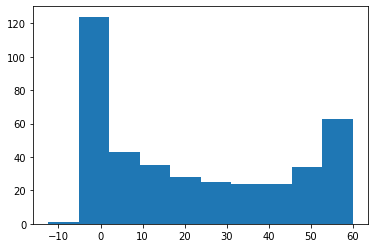

In [255]:
plt.hist(opcao-opcao_port_1)

In [482]:
################################################33
###########Modelo de Competicao#################


In [194]:
#Importar Case 2 ou ABC ou ABCD como case 
case=pd.read_csv("Case_Guy.csv", sep=';')
case.set_index('Type', inplace=True)
case.Owner=case.Owner.astype(int)
case=case.astype(float).T
case

Type,DogFish,Feather,Head
CF,0.3,0.25,0.20
I_w,80.0,60.00,80.00
q,0.2,0.21,0.18
B,620.0,310.00,950.00
Owner,0.0,0.00,1.00


In [195]:
#Importar correlacao Case 2 ou ABC ou ABCD como case
case_corr=pd.read_csv("Case_Guy_corr.csv", sep=';')
case_corr.set_index('Type', inplace=True)
case_corr


,DogFish,Feather,Head
Type,,,
DogFish,1.0,0.6,0.5
Feather,0.6,1.0,0.6
Head,0.5,0.6,1.0


In [196]:
case.iloc[2,:]=case.iloc[2,:]*np.exp(-2*delta)
case.head()

Type,DogFish,Feather,Head
CF,0.300000,0.250000,0.200000
I_w,80.000000,60.000000,80.000000
q,0.185363,0.194631,0.166827
B,620.000000,310.000000,950.000000
Owner,0.000000,0.000000,1.000000


In [104]:
#############################################

In [486]:
#################Sem cortes - com case_b1


####Separação do ativo do vizinho -Caso bem particular onde há um só ativo e 
sinal=1  #sinal up igual a 1 e sinal down igual a 0
stra_rho=[]
stra_rho.append(case_corr[case.columns[case.loc['Owner']==1]].iloc[0,0])
stra_rho.append(case_corr[case.columns[case.loc['Owner']==1]].iloc[1,0])
print(stra_rho)

FC_viz=case[case.columns[case.loc['Owner']==1]].iloc[0,0]

case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==1]])
case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==1]],axis=1)


case=case.drop(case[case.columns[case.loc['Owner']==1]],axis=1)




                         
                         
fold=[]
seq=[]
P=50
n=case.shape[1]
perm=itertools.permutations(range(n))
for k in list(perm):
    seq.append(k)
    #print(k)
    m=np.zeros((2**(n-1),n))
    p=np.zeros((2**(n-1),n))
    pi=np.zeros((2**(n-1),n))
    m[m==0]=np.nan
    p[m==0]=np.nan
    pi[pi==0]=np.nan
    
                         
    #m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
    #pi[0,0]=m[0,0]*(V(P,case,0) - I(P,case,0)) -case.iloc[1,k[0]]
    
    if sinal==1:
        
        m[0,0]=case.iloc[0,k[0]] + stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/FC_viz 
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        print(stra_rho[k[0]], m[0,0], case.iloc[0,k[0]])
        #print(1,m[0,0],pi[0,0] )
    
    elif sinal==0:
        #print(0)
        m[0,0]=case.iloc[0,k[0]] - stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/(1-FC_viz) 
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(0,m[0,0],pi[0,0])
                         
        
    
    
                         
                         
    #Vetores Auxiliares
    Ax_m=[]
    Ax1_m=[]
    Ax_pi=[]
    Ax_lim=[]
    ##Loop para criacao da matriz de FC e VME
    for y in range(1,n,1):
        if sinal==1:
            Ax_m.append(case.iloc[0,k[y]] + stra_rho[k[y]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[y]]*(1-case.iloc[0,k[y]]))/FC_viz) 
            #print(stra_rho[k[0]], m[0,0], case.iloc[0,k[0]])
            #print(1,m[0,0],pi[0,0] )
    
        elif sinal==0:
            #print(0)
            Ax_m.append(case.iloc[0,k[y]] - stra_rho[k[y]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[y]]*(1-case.iloc[0,k[y]]))/(1-FC_viz)) 
            #print(0,m[0,0],pi[0,0])
                         
        
        
    
    for j in range(n-1):
        p=0
        for q in range(1+j,n,1):
            for i in range(2**(j)):
                p=p+1
                #print(p-1,j,q,i,j)
                CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                Ax1_m.append(CF_s)
                CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                Ax1_m.append(CF_ins)
                #print(CF_s,CF_ins)
                
                Ax_pi.append(CF_s*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                Ax_pi.append(CF_ins*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                
                a=np.minimum(Ax_m[p-1],m[i,j])*(1-np.maximum(Ax_m[p-1],m[i,j]))
                b=np.maximum(Ax_m[p-1],m[i,j])*(1-np.minimum(Ax_m[p-1],m[i,j]))
                Ax_lim.append(np.sqrt(a/b)>case_corr.iloc[k[j],k[q]])
                
                a=-np.sqrt(Ax_m[p-1]*m[i,j]/(1-Ax_m[p-1])*(1-m[i,j]))
                b=-np.sqrt((1-Ax_m[p-1])*(1-m[i,j])/Ax_m[p-1]*m[i,j])
                Ax_lim.append(np.maximum(a,b)<case_corr.iloc[k[j],k[q]])
                

        m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
        pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]
        
        del Ax1_m[0:2*(i+1)]
        
        print(Ax_lim)
        Ax_m=Ax1_m
        Ax1_m=[]
        Ax_pi=[]
        Ax_lim=[]
    
    print(100*m)
    print(pi)
    
    for l in np.arange(n-2,-1,-1):
        #print(l)
        for g in range(2**(l)):
            #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
            pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
    print(pi)
    fold.append(pi[0,0])
    

###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
winner=np.amax(fold)
Seq_winner=seq[np.argmax(fold)]
winner=np.maximum(0,winner)
if winner==0:
    Seq_winner='W'

    
    
            

    #print(fold)
    #print(m)
print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
#print(fold)
    
    
    
    
    
    

[0.5, 0.6]
0.5 0.758257569495584 0.3
[True, True]
[[75.82575695 91.22689345]
 [        nan 32.21627957]]
[[1444.31046352  708.79031123]
 [          nan  211.4941029 ]]
[[2032.88318066  708.79031123]
 [          nan  211.4941029 ]]
0.6 0.7696152422706632 0.25
[True, True]
[[76.96152423 89.88060358]
 [        nan 28.87462918]]
[[ 588.57271715 1726.85231536]
 [          nan  500.46106175]]
[[2032.88318066 1726.85231536]
 [          nan  500.46106175]]
melhor portfolio é: (1, 0) e o valor é: 2032.8831806625371 [2032.883180662537, 2032.8831806625371]


In [477]:
def carteira_estra_old(case,case_corr,P,sinal):
    #################Formalizacao caso 4 - correto
    
    #sinal=1  #sinal up igual a 1 e sinal down igual a 0
    stra_rho=[]
    stra_rho.append(case_corr[case.columns[case.loc['Owner']==1]].iloc[0,0])
    stra_rho.append(case_corr[case.columns[case.loc['Owner']==1]].iloc[1,0])
    #stra_rho.append(0.1)
    #stra_rho.append(0.1)


    FC_viz=case[case.columns[case.loc['Owner']==1]].iloc[0,0]
    
    case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==1]])
    case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==1]],axis=1)


    case=case.drop(case[case.columns[case.loc['Owner']==1]],axis=1)

    
    
    
    fold=[]
    seq=[]
    #P=50
    n=case.shape[1]
    perm=itertools.permutations(range(n))
    for k in list(perm):
        seq.append(k)
        #print(k)
        m=np.zeros((2**(n-1),n))
        p=np.zeros((2**(n-1),n))
        pi=np.zeros((2**(n-1),n))
        m[m==0]=np.nan
        p[m==0]=np.nan
        pi[pi==0]=np.nan
        
        
        if sinal==1:
            m[0,0]=case.iloc[0,k[0]] + stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/FC_viz 
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)*np.exp(-2*r)) -case.iloc[1,k[0]]
        
        elif sinal==0:
            m[0,0]=case.iloc[0,k[0]] - stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/(1-FC_viz) 
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)*np.exp(-2*r)) -case.iloc[1,k[0]]
        
        else:
            #print(2)
            m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[5,k[0]]+650)*np.exp(-2*r)) -case.iloc[1,k[0]]
        

        

        #Vetores Auxiliares
        Ax_m=[]
        Ax1_m=[]
        Ax_pi=[]
        ##Loop para criacao da matriz de FC e VME
        for y in range(1,n,1):
            Ax_m.append(case.iloc[0,k[y]])


        for j in range(n-1):
            p=0
            for q in range(1+j,n,1):
                for i in range(2**(j)):
                    p=p+1
                    #print(p-1,j,q,i,j)
                    CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                    Ax1_m.append(CF_s)
                    CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                    Ax1_m.append(CF_ins)

                    Ax_pi.append(CF_s*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)*np.exp(-2*r)) -case.iloc[1,k[j+1]])
                    Ax_pi.append(CF_ins*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)*np.exp(-2*r)) -case.iloc[1,k[j+1]])


            m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
            pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]

            del Ax1_m[0:2*(i+1)]

            Ax_m=Ax1_m
            Ax1_m=[]
            Ax_pi=[]

        #print(100*m)
        #print(pi)

        for l in np.arange(n-2,-1,-1):
            #print(l)
            for g in range(2**(l)):
                #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
                pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
        #print(pi)
        fold.append(pi[0,0])


    ###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
    winner=np.amax(fold)
    Seq_winner=seq[np.argmax(fold)]
    winner=np.maximum(0,winner)
    if winner==0:
        Seq_winner='W'





        #print(fold)
        #print(m)
    #print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
    #print(fold)
    return[Seq_winner,winner,fold]







In [480]:
#################Formalizacao caso - com competição  
###OLD############OLD######

####Separação do ativo do vizinho -Caso bem particular onde há um só ativo e 
sinal=1  #sinal up igual a 1 e sinal down igual a 0
stra_rho=[]
stra_rho.append(case_corr[case.columns[case.loc['Owner']==1]].iloc[0,0])
stra_rho.append(case_corr[case.columns[case.loc['Owner']==1]].iloc[1,0])

FC_viz=case[case.columns[case.loc['Owner']==1]].iloc[0,0]

case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==1]])
case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==1]],axis=1)


case=case.drop(case[case.columns[case.loc['Owner']==1]],axis=1)




                         
                         
fold=[]
seq=[]
P=50
n=case.shape[1]
perm=itertools.permutations(range(n))
for k in list(perm):
    seq.append(k)
    #print(k)
    m=np.zeros((2**(n-1),n))
    p=np.zeros((2**(n-1),n))
    pi=np.zeros((2**(n-1),n))
    m[m==0]=np.nan
    p[m==0]=np.nan
    pi[pi==0]=np.nan
    
                         
    #m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
    #pi[0,0]=m[0,0]*(V(P,case,0) - I(P,case,0)) -case.iloc[1,k[0]]
    
    if sinal==1:
        
        m[0,0]=case.iloc[0,k[0]] + stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/FC_viz 
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(1,m[0,0],pi[0,0])
    
    elif sinal==0:
        #print(0)
        m[0,0]=case.iloc[0,k[0]] - stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/(1-FC_viz) 
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(0,m[0,0],pi[0,0])
                         
    else:
        #print(2)
        m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(2,m[0,0],pi[0,0])
        
    
    
                         
                         
    #Vetores Auxiliares
    Ax_m=[]
    Ax1_m=[]
    Ax_pi=[]
    Ax_lim=[]
    ##Loop para criacao da matriz de FC e VME
    for y in range(1,n,1):
        Ax_m.append(case.iloc[0,k[y]])
    
    
    for j in range(n-1):
        p=0
        for q in range(1+j,n,1):
            for i in range(2**(j)):
                p=p+1
                #print(p-1,j,q,i,j)
                CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                Ax1_m.append(CF_s)
                CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                Ax1_m.append(CF_ins)
                
                Ax_pi.append(CF_s*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                Ax_pi.append(CF_ins*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                
                a=np.minimum(Ax_m[p-1],m[i,j])*(1-np.maximum(Ax_m[p-1],m[i,j]))
                b=np.maximum(Ax_m[p-1],m[i,j])*(1-np.minimum(Ax_m[p-1],m[i,j]))
                Ax_lim.append(np.sqrt(a/b)>case_corr.iloc[k[j],k[q]])
                
                a=-np.sqrt(Ax_m[p-1]*m[i,j]/(1-Ax_m[p-1])*(1-m[i,j]))
                b=-np.sqrt((1-Ax_m[p-1])*(1-m[i,j])/Ax_m[p-1]*m[i,j])
                Ax_lim.append(np.maximum(a,b)<case_corr.iloc[k[j],k[q]])
                

        m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
        pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]
        
        del Ax1_m[0:2*(i+1)]
        
        #print(Ax_lim)
        Ax_m=Ax1_m
        Ax1_m=[]
        Ax_pi=[]
        Ax_lim=[]
    
   # print(100*m)
    #print(pi)
    
    for l in np.arange(n-2,-1,-1):
        #print(l)
        for g in range(2**(l)):
            #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
            pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
    #print(pi)
    fold.append(pi[0,0])
    

###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
winner=np.amax(fold)
Seq_winner=seq[np.argmax(fold)]
winner=np.maximum(0,winner)
if winner==0:
    Seq_winner='W'

    
    
            

    #print(fold)
    #print(m)
print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
#print(fold)
    
    
    
    
    
    

melhor portfolio é: (0, 1) e o valor é: 1652.3046479296636 [1652.3046479296636, 1223.8917602704876]


In [197]:
def carteira_estra(case,case_corr,P,sinal):
    #################Formalizacao caso 4 - correto
    
    #sinal=1  #sinal up igual a 1 e sinal down igual a 0
    stra_rho=[]
    stra_rho.append(case_corr[case.columns[case.loc['Owner']==1]].iloc[0,0])
    stra_rho.append(case_corr[case.columns[case.loc['Owner']==1]].iloc[1,0])
    #stra_rho.append(0.1)
    #stra_rho.append(0.1)


    FC_viz=case[case.columns[case.loc['Owner']==1]].iloc[0,0]
    
    case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==1]])
    case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==1]],axis=1)


    case=case.drop(case[case.columns[case.loc['Owner']==1]],axis=1)

    
    
    
    fold=[]
    seq=[]
    #P=50
    n=case.shape[1]
    perm=itertools.permutations(range(n))
    for k in list(perm):
        seq.append(k)
        #print(k)
        m=np.zeros((2**(n-1),n))
        p=np.zeros((2**(n-1),n))
        pi=np.zeros((2**(n-1),n))
        m[m==0]=np.nan
        p[m==0]=np.nan
        pi[pi==0]=np.nan
        
        
        if sinal==1:
            m[0,0]=case.iloc[0,k[0]] + stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/FC_viz 
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)*np.exp(-2*r)) -case.iloc[1,k[0]]
        
        elif sinal==0:
            m[0,0]=case.iloc[0,k[0]] - stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/(1-FC_viz) 
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)*np.exp(-2*r)) -case.iloc[1,k[0]]
        

        

        #Vetores Auxiliares
        Ax_m=[]
        Ax1_m=[]
        Ax_pi=[]
        ##Loop para criacao da matriz de FC e VME
        for y in range(1,n,1):
            if sinal==1:
                aba=case.iloc[0,k[y]] + stra_rho[k[y]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[y]]*(1-case.iloc[0,k[y]]))/FC_viz 
            
            elif sinal==0:
                aba=case.iloc[0,k[y]] - stra_rho[k[y]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[y]]*(1-case.iloc[0,k[y]]))/(1-FC_viz) 
            
            
            
            Ax_m.append(aba)
            #print(Ax_m)


        for j in range(n-1):
            p=0
            for q in range(1+j,n,1):
                for i in range(2**(j)):
                    p=p+1
                    #print(case_corr.iloc[k[j],k[q]])
                    #print(p-1,j,q,i,j)
                    CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                    Ax1_m.append(CF_s)
                    CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                    Ax1_m.append(CF_ins)

                    Ax_pi.append(CF_s*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)*np.exp(-2*r)) -case.iloc[1,k[j+1]])
                    Ax_pi.append(CF_ins*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)*np.exp(-2*r)) -case.iloc[1,k[j+1]])


            m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
            pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]

            del Ax1_m[0:2*(i+1)]

            Ax_m=Ax1_m
            Ax1_m=[]
            Ax_pi=[]

        #print(100*m)
        #print(pi)

        for l in np.arange(n-2,-1,-1):
            #print(l)
            for g in range(2**(l)):
                #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
                pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
        #print(pi)
        fold.append(pi[0,0])


    ###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
    winner=np.amax(fold)
    Seq_winner=seq[np.argmax(fold)]
    winner=np.maximum(0,winner)
    if winner==0:
        Seq_winner='W'





        #print(fold)
        #print(m)
    #print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
    #print(fold)
    return[Seq_winner,winner,fold]







In [146]:
carteira_estra(case,case_corr,70,1)

[(0, 1), 4704.447409882279, [4704.447409882279, 4704.447409882279]]

In [147]:
case

Type,DogFish,Feather,Head
CF,0.300000,0.250000,0.200000
I_w,80.000000,60.000000,80.000000
q,0.185363,0.194631,0.166827
B,620.000000,310.000000,950.000000
Owner,0.000000,0.000000,1.000000


In [148]:
case_corr

,DogFish,Feather,Head
Type,,,
DogFish,1.0,0.6,0.5
Feather,0.6,1.0,0.6
Head,0.5,0.6,1.0


In [149]:
case_b1

Type,DogFish,Feather
CF,0.300000,0.250000
I_w,80.000000,60.000000
q,0.185363,0.194631
B,620.000000,325.000000
Owner,0.000000,0.000000


In [150]:
case_corr_b1

,DogFish,Feather
Type,,
DogFish,1.0,0.6
Feather,0.6,1.0


In [160]:
carteira_estra(case,case_corr,50,1)

[(1, 0), 2032.8831806625371, [2032.883180662537, 2032.8831806625371]]

In [161]:
carteira_estra(case,case_corr,50,0)

[(0, 1), 364.30089453777623, [364.30089453777623, 333.9854603652708]]

In [162]:
carteira(case_b1,case_corr_b1,50)[1]

673.7650044247241

In [163]:
carteira_estra(case,case_corr,50,0)[1]*0.8 + carteira_estra(case,case_corr,50,1)[1]*0.2

698.0173517627285

In [164]:
for i in range(300):
    print(i ,carteira_estra(case,case_corr,i,0)[1]*0.8 + carteira_estra(case,case_corr,i,1)[1]*0.2 - carteira(case_b1,case_corr_b1,i)[1])

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 10.00478033456855
35 21.512632835907148
36 4.4636519749380525
37 0.0
38 2.700006845296315
39 4.072495792955152
40 6.272459993569925
41 8.584743385379255
42 10.8970267771885
43 13.209310168997831
44 15.521593560807162
45 17.833876952616492
46 20.146160344425766
47 22.458443736235154
48 24.770727128044427
49 25.315316824711772
50 24.25234733800437
51 23.189377851296854
52 22.126408364589338
53 21.06343887788171
54 20.000469391174306
55 18.937499904466904
56 17.874530417759388
57 16.81156093105176
58 15.748591444344356
59 14.685621957637068
60 13.622652470929324
61 12.559682984222036
62 11.496713497514293
63 10.433744010806777
64 9.370774524099488
65 8.307805037391745
66 7.244835550684229
67 6.181866063976713
68 5.11889657726897
69 4.055927090561909
70 2.9929576

In [198]:
def diffinexpcartestra(case,case_corr,sinal,P,r,div,sigma,tau,accur):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    #accur=0.05  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaP=P*accur
    
    # M são as divisões do grid em V
    #Perpetuidade vcritico não esta na programacao
    #M= int(1.1*vcritico(I,r,div,sigma,tau)[2]/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    Pmax=2*P
    M=int(Pmax/deltaP)
    PGrid=int(P/deltaP) #Ponto do grid onde esta P_0. 
    
    #deltat= (deltaP**2)/((sigma**2)*((3*I)**2)) #Convergência: Critério do peso central >=0. Pmax=3I ><1.1Gatilho_perp
    deltat= (deltaP**2)/((sigma**2)*(Pmax**2))
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    
    #Vetor Pt
    Pt=np.zeros(M+1)
    Gatilho=np.zeros((N+1,M+1), dtype=object)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Pt[i]= i*deltaP
        solution=carteira_estra(case,case_corr,Pt[i],sinal)
        F[N,i]=solution[1]
        #print(solution[0])
        Gatilho[N,i]=solution[0]
        #F[N,i]=np.maximum(0,Pt[i]-I)
    #Gatilho[N]=I
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pdown = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pdown*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            #if F[j,i]< Vt[i]-I and F[j,i-1]>Pt[i-1]-I:
            #    Gatilho[j]=(Pt[i]+Vt[i-1])/2
            
            solution=carteira_estra(case,case_corr,Pt[i],sinal)
            if F[j,i]>=solution[1]: #opcao americana e gatilho
                Gatilho[j,i]='W'
            else:
                Gatilho[j,i]=solution[0]
                F[j,i]=solution[1]
        
        
        F[j,0]=0
        Gatilho[j,0]='W'
        solution=carteira_estra(case,case_corr,Pmax,sinal)
        F[j,M]=solution[1]
        Gatilho[j,M]=solution[0]
        
    T=np.linspace(0,tau,num=N+1)
    
    ###############Dataframe do Gatilho##############
    #print(Gatilho.shape[0])
    dframe=pd.DataFrame(list(range(Gatilho.shape[0])))
    dframe.columns=['Time']
    dframe= dframe.set_index('Time')

    for i in range(Gatilho.shape[0]):
        check=Gatilho[i,0]
        for j in range(Gatilho.shape[1]):
            if check == Gatilho[i,j]:
                check=check
            else:
                #print(i,j,'{}'.format(check),Gatilho[i,j],j)
                dframe.loc[i,'{}'.format(Gatilho[i,j])]=Pt[j]
                check=Gatilho[i,j]
    dframe.index=T
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,PGrid],dframe,T,Pt,F, Gatilho]



In [199]:
accur=0.02

In [200]:
start=time.time()
opcao_pos,gdf_pos,tempo_pos,preco_pos,mapa_pos,gatilho_pos= diffinexpcartestra(case,case_corr,1,P,r,delta,sigma,tau,accur)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 33.18550343513489


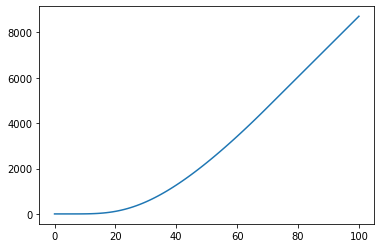

In [201]:
plt.plot(mapa_pos[0,:])

In [202]:
gdf_pos.head()

,"(0, 1)","(1, 0)",W
0.000000,94.0,93.0,NaN
0.001111,94.0,93.0,NaN
0.002221,94.0,93.0,NaN
0.003332,94.0,93.0,NaN
0.004443,94.0,93.0,NaN


In [347]:
winsound.Beep(freq,duration)

In [203]:
np.savetxt('Port_Explorar_pos_opcao_dog_feather.txt',mapa_pos[0,:])

In [204]:
np.savetxt('Port_Explorar_pos_preco_dog_feather.txt',preco_pos)

In [205]:
start=time.time()
opcao_neg,gdf_neg,tempo_neg,preco_neg,mapa_neg,gatilho_neg= diffinexpcartestra(case,case_corr,0,P,r,delta,sigma,tau,accur)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 32.68847057422002


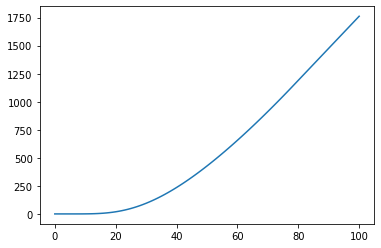

In [206]:
plt.plot(mapa_neg[0,:])

In [207]:
gdf_neg.head()

,"(1, 0)","(0, 1)",W
0.000000,99.0,100.0,NaN
0.001111,99.0,100.0,NaN
0.002221,99.0,100.0,NaN
0.003332,99.0,100.0,NaN
0.004443,99.0,100.0,NaN


In [353]:
winsound.Beep(freq,duration)

In [208]:
np.savetxt('Port_Explorar_neg_opcao_dog_feather.txt',mapa_neg[0,:])

In [209]:
np.savetxt('Port_Explorar_neg_preco_dog_feather.txt',preco_neg)

In [321]:
def diffinexp(case,V,r,div,sigma,tau):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    accur=0.1  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaV=V*accur
    
    # M são as divisões do grid em V
    #forcei a barra- coloque 3 vezes a V de perpetuidade. Estava 1,1 
    Vmax=4*V
    M= int(Vmax/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    VGrid=int(V/deltaV) #Ponto do grid onde esta V_0. 
    deltat= (deltaV**2)/((sigma**2)*(Vmax**2)) #Convergência: Critério do peso central >=0. Vmax=3I ><1.1Gatilho_perp
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    #Vetor Vt
    Vt=np.zeros(M+1)
    Gatilho=np.zeros(N+1)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Vt[i]= i*deltaV
        #F[N,i]=np.maximum(0,Vt[i]-I)
        F[N,i]=np.maximum(0,caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0])
    Gatilho[N]=caseR.iloc[0,0]*(Vt[i]/50)*case.iloc[5,0] + case.iloc[1,0]
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pd = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pd*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            if F[j,i]< caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0] and F[j,i-1]>caseR.iloc[0,0]*(Vt[i-1]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i-1]/50)*case.iloc[5,0]) -case.iloc[1,0]:
                Gatilho[j]=(Vt[i]+Vt[i-1])/2
            
            F[j,i]=np.maximum(caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0], F[j,i])  #opção americana
        
        
        F[j,0]=0
        F[j,M]=caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0]
        
        
    T=np.linspace(0,tau,num=len(Gatilho))
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,VGrid],Gatilho,T,Vt,F]



In [301]:
start=time.time()

r2=diffinexpcartestra(case,case_corr,2,50,r,delta,sigma,tau)
print(r2[0])

14.011472926007304


In [302]:
r1=diffinexpcartestra(case,case_corr,1,50,r,delta,sigma,tau)

In [303]:
r0=diffinexpcartestra(case,case_corr,0,50,r,delta,sigma,tau)

In [304]:
FC_viz*r1[0] + (1-FC_viz)*r0[0]

23.248679387511107

In [305]:
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 34.52971352338791


In [330]:
start=time.time()
rabc=diffinexpcart(case_ABC,case_ABC_corr,50,r,delta,sigma,tau)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 7.226902592182159


In [325]:
caseR=case[case.columns[case.loc['Owner']==0]]
caseR

Type,R
CF,0.20
I_w,50.00
P,50.00
q,0.12
B,700.00
I_d,4000.00
Owner,0.00


In [320]:


print('VME-R',caseR.iloc[0,0]*(caseR.iloc[2,0]*caseR.iloc[3,0]*caseR.iloc[4,0] - (caseR.iloc[2,0]/50)*caseR.iloc[5,0]) -caseR.iloc[1,0])


VME-R -10.0


In [323]:
rr=diffinexp(caseR,50,r,delta,sigma,tau)

In [336]:
####
print('Portfolio sem considerar o vizinho:', r2[0])
print('Portfolio considerando o vizinho:',FC_viz*r1[0] + (1-FC_viz)*r0[0])
print('Diferença - Valor adicionado pela informação do vizinho:',FC_viz*r1[0] + (1-FC_viz)*r0[0] - r2[0] )
print('Portfolio do vizinho:', rr[0])
print('Portfolio incorporando o ativo do vizinho:',rabc[0])
print('Diferença - Incorporar ou não o ativo do vizinho:',rabc[0]-FC_viz*r1[0] - (1-FC_viz)*r0[0])

Portfolio sem considerar o vizinho: 14.011472926007304
Portfolio considerando o vizinho: 23.248679387511107
Diferença - Valor adicionado pela informação do vizinho: 9.237206461503803
Portfolio do vizinho: 1.9112132260213393
Portfolio incorporando o ativo do vizinho: 27.68702560763952
Diferença - Incorporar ou não o ativo do vizinho: 4.4383462201284125
